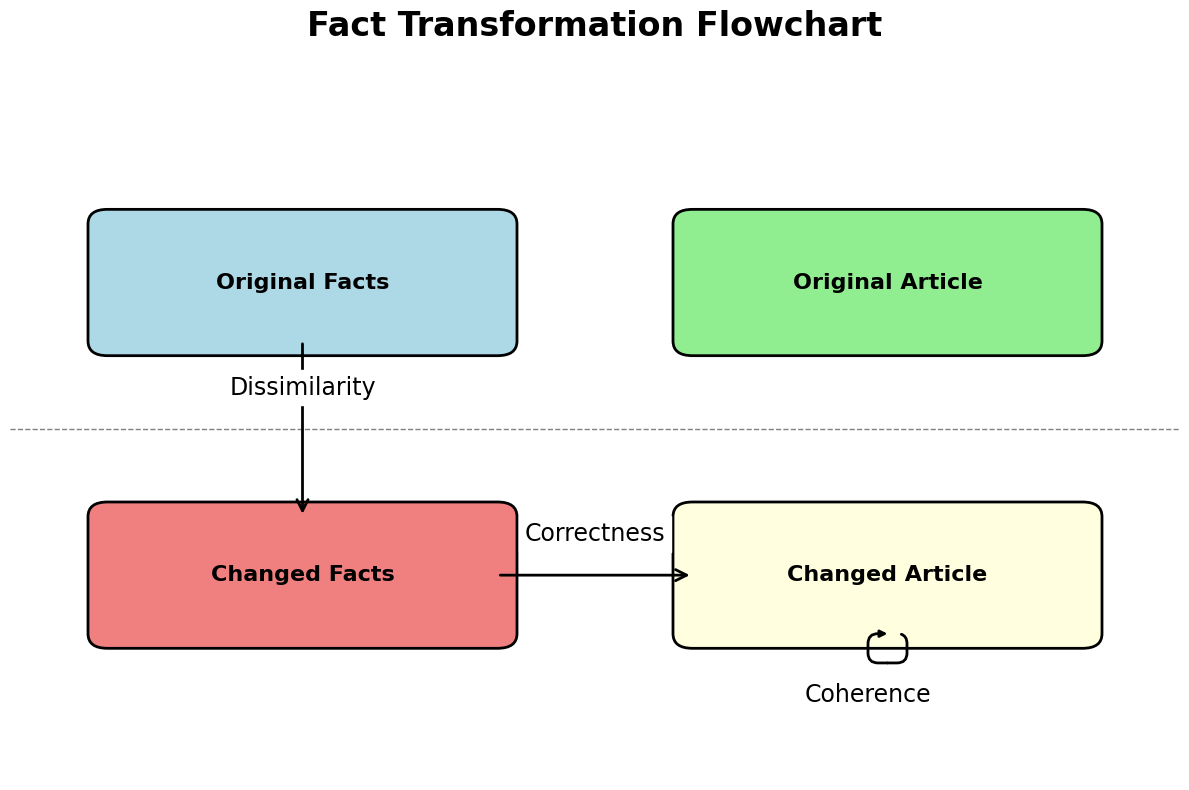

In [12]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

# Initialize the plot with desired figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Width=12 inches, Height=8 inches

# Define node attributes with adjusted positions
nodes = {
    "Original Facts": (-1.5, 5),
    "Original Article": (1.5, 5),
    "Changed Facts": (-1.5, 3),
    "Changed Article": (1.5, 3)
}

# Define node size (consistent width for all nodes)
node_width = 2.0
node_height = 0.8

# Define colors for different node types
node_colors = {
    "Original Facts": 'lightblue',
    "Original Article": 'lightgreen',
    "Changed Facts": 'lightcoral',
    "Changed Article": 'lightyellow'
}

# Calculate dynamic x-axis limits based on node positions
x_positions = [pos[0] for pos in nodes.values()]
min_x = min(x_positions)
max_x = max(x_positions)

# Define padding based on node width
padding = 0.5
x_min_limit = min_x - (node_width / 2) - padding
x_max_limit = max_x + (node_width / 2) + padding

# Similarly, calculate y-axis limits
y_positions = [pos[1] for pos in nodes.values()]
min_y = min(y_positions)
max_y = max(y_positions)
y_padding = 1.0
y_min_limit = min_y - (node_height / 2) - y_padding
y_max_limit = max_y + (node_height / 2) + y_padding

# Set dynamic axes limits to crop left and right margins
ax.set_xlim(x_min_limit, x_max_limit)
ax.set_ylim(y_min_limit, y_max_limit)



# Optionally, maintain aspect ratio
# ax.set_aspect('equal')  # Uncomment if you want a 1:1 aspect ratio

ax.axis('off')  # Hide the axes

# Draw nodes
for label, (x, y) in nodes.items():
    # Use FancyBboxPatch for rounded rectangles
    rect = FancyBboxPatch(
        (x - node_width / 2, y - node_height / 2),
        node_width,
        node_height,
        boxstyle="round,pad=0.1",
        facecolor=node_colors.get(label, 'lightblue'),
        edgecolor='black',
        linewidth=2,
        zorder=1  # Nodes are below arrows
    )
    ax.add_patch(rect)
    # Add text label with increased font size
    ax.text(
        x, y, label, 
        ha='center', va='center',
        fontsize=16,  # Increased from 12 to 16
        fontweight='bold',
        wrap=True, 
        zorder=2  # Text above nodes
    )

# Add dashed horizontal line in the middle
mid_y = (5 + 3) / 2  # y=4
ax.axhline(y=mid_y, linestyle='--', color='gray', linewidth=1, zorder=0)

# Define edges as tuples of (start_node, end_node, label)
edges = [
    ("Original Facts", "Changed Facts", "Dissimilarity"),
    ("Changed Facts", "Changed Article", "Correctness"),
    ("Changed Article", "Changed Article", "Coherence")  # Loop
]

# Function to get node center positions
def get_pos(node):
    return nodes[node]

# Draw arrows and add labels
for start, end, label in edges:
    start_x, start_y = get_pos(start)
    end_x, end_y = get_pos(end)
    
    if start != end:
        # Calculate direction vector
        dx = end_x - start_x
        dy = end_y - start_y
        distance = (dx**2 + dy**2)**0.5
        if distance == 0:
            distance = 0.1  # Prevent division by zero
        
        # Normalized direction
        dx_norm = dx / distance
        dy_norm = dy / distance
        
        # Adjust start and end points to be at the edge of the rectangles
        start_adj_x = start_x + dx_norm * (node_width / 2)
        start_adj_y = start_y + dy_norm * (node_height / 2)
        end_adj_x = end_x - dx_norm * (node_width / 2)
        end_adj_y = end_y - dy_norm * (node_height / 2)
        
        # Create and add the arrow
        arrow = FancyArrowPatch(
            (start_adj_x, start_adj_y),
            (end_adj_x, end_adj_y),
            arrowstyle='->',
            mutation_scale=20,  # Increased size of the arrowhead
            linewidth=2,        # Increased thickness of the arrow
            color='black',
            zorder=3  # Arrows are above nodes and text
        )
        ax.add_patch(arrow)
        
        # Add arrow label at the midpoint with increased font size
        mid_x = (start_adj_x + end_adj_x) / 2
        mid_y = (start_adj_y + end_adj_y) / 2
        ax.text(
            mid_x, mid_y + 0.2, label,  # Slightly offset vertically
            ha='center', va='bottom',
            fontsize=17,  # Increased from 12 to 14
            color='black',
            backgroundcolor='white',
            zorder=4
        )
    else:
        # Handle loop arrows (Changed Article -> Changed Article)
        loop_radius = 1.2
        loop_center_x = end_x + loop_radius
        loop_center_y = end_y + loop_radius
        x_center = 1.5
        y_center = 2.5
        radius = 0.1
        linewidth = 2


        ax.annotate("", (x_center + radius, y_center), (x_center, y_center + radius),
            arrowprops=dict(arrowstyle="-",
                            shrinkA=10,  # creates a gap between the start point and end point of the arrow
                            shrinkB=0,
                            linewidth=linewidth,
                            connectionstyle="angle,angleB=-90,angleA=180,rad=10"))    

        ax.annotate("", (x_center, y_center - radius), (x_center + radius, y_center), 
            arrowprops=dict(arrowstyle="-",
                            shrinkA=0, 
                            shrinkB=0,
                            linewidth=linewidth,
                            connectionstyle="angle,angleB=180,angleA=-90,rad=10"))    

        ax.annotate("", (x_center - radius, y_center),  (x_center, y_center - radius), 
            arrowprops=dict(arrowstyle="-",
                            shrinkA=0, 
                            shrinkB=0,
                            linewidth=linewidth,
                            connectionstyle="angle,angleB=-90,angleA=180,rad=10"))    
        ax.annotate("", (x_center, y_center + radius), (x_center - radius, y_center), 
            arrowprops=dict(arrowstyle="-|>",
                            facecolor="k",
                            linewidth=linewidth,
                            shrinkA=0, 
                            shrinkB=0,
                            connectionstyle="angle,angleB=180,angleA=-90,rad=10"))
        
        # Add loop label near the loop with increased font size
        ax.text(
            x_center - radius, y_center - radius - 0.3, label,
            ha='center', va='bottom',
            fontsize=17,  # Increased from 12 to 14
            color='black',
            backgroundcolor='white',
            zorder=4
        )

# Add title with increased font size
plt.title("Fact Transformation Flowchart", fontsize=24, fontweight='bold', pad=30)

# Adjust layout to ensure everything fits without clipping
plt.tight_layout()

# Save the plot as an image file using fig.savefig
fig.savefig('fact_transformation_flowchart.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution

# Display the plot
plt.show()



In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, FancyBboxPatch

# Initialize the plot with desired figure size
fig, ax = plt.subplots(figsize=(12, 8))  # Width=12 inches, Height=8 inches

# Define node attributes with adjusted positions
nodes = {
    "Original Facts": (-1.5, 5),
    "Original Article": (1.5, 5),
    "Changed Facts": (-1.5, 3),
    "Changed Article": (1.5, 3)
}

# Define node size (consistent width for all nodes)
node_width = 2.0
node_height = 0.8

# Define colors for different node types
node_colors = {
    "Original Facts": 'lightblue',
    "Original Article": 'lightgreen',
    "Changed Facts": 'lightcoral',
    "Changed Article": 'lightyellow'
}

# Calculate dynamic x-axis limits based on node positions
x_positions = [pos[0] for pos in nodes.values()]
min_x = min(x_positions)
max_x = max(x_positions)

# Define padding based on node width
padding = 1.0  # Increased padding for better spacing
x_min_limit = min_x - (node_width / 2) - padding
x_max_limit = max_x + (node_width / 2) + padding

# Similarly, calculate y-axis limits
y_positions = [pos[1] for pos in nodes.values()]
min_y = min(y_positions)
max_y = max(y_positions)
y_padding = 1.0
y_min_limit = min_y - (node_height / 2) - y_padding
y_max_limit = max_y + (node_height / 2) + y_padding

# Set dynamic axes limits to crop left and right margins
ax.set_xlim(x_min_limit, x_max_limit)
ax.set_ylim(y_min_limit, y_max_limit)

# Optionally, maintain aspect ratio
# ax.set_aspect('equal')  # Uncomment if you want a 1:1 aspect ratio

ax.axis('off')  # Hide the axes

# Draw nodes
for label, (x, y) in nodes.items():
    # Use FancyBboxPatch for rounded rectangles
    rect = FancyBboxPatch(
        (x - node_width / 2, y - node_height / 2),
        node_width,
        node_height,
        boxstyle="round,pad=0.1",
        facecolor=node_colors.get(label, 'lightblue'),
        edgecolor='black',
        linewidth=2,
        zorder=1  # Nodes are below arrows
    )
    ax.add_patch(rect)
    # Add text label with increased font size
    ax.text(
        x, y, label, 
        ha='center', va='center',
        fontsize=16,  # Increased font size
        fontweight='bold',
        wrap=True, 
        zorder=2  # Text above nodes
    )

# Add dashed horizontal line in the middle
mid_y = (5 + 3) / 2  # y=4
ax.axhline(y=mid_y, linestyle='--', color='gray', linewidth=1, zorder=0)

# Define edges as tuples of (start_node, end_node, label)
edges = [
    ("Original Facts", "Changed Facts", "Dissimilarity"),
    ("Changed Facts", "Changed Article", "Correctness"),
    ("Changed Article", "Changed Article", "Coherence")  # Loop
]

# Function to get node center positions
def get_pos(node):
    return nodes[node]

# Draw arrows and add labels
for start, end, label in edges:
    start_x, start_y = get_pos(start)
    end_x, end_y = get_pos(end)
    
    if start != end:
        # Calculate direction vector
        dx = end_x - start_x
        dy = end_y - start_y
        distance = (dx**2 + dy**2)**0.5
        if distance == 0:
            distance = 0.1  # Prevent division by zero
        
        # Normalized direction
        dx_norm = dx / distance
        dy_norm = dy / distance
        
        # Adjust start and end points to be at the edge of the rectangles
        start_adj_x = start_x + dx_norm * (node_width / 2)
        start_adj_y = start_y + dy_norm * (node_height / 2)
        end_adj_x = end_x - dx_norm * (node_width / 2)
        end_adj_y = end_y - dy_norm * (node_height / 2)
        
        # Create and add the arrow
        arrow = FancyArrowPatch(
            (start_adj_x, start_adj_y),
            (end_adj_x, end_adj_y),
            arrowstyle='->',
            mutation_scale=20,  # Increased size of the arrowhead
            linewidth=2,        # Increased thickness of the arrow
            color='black',
            zorder=3  # Arrows are above nodes and text
        )
        ax.add_patch(arrow)
        
        # Add arrow label at the midpoint with increased font size
        mid_x = (start_adj_x + end_adj_x) / 2
        mid_y = (start_adj_y + end_adj_y) / 2
        ax.text(
            mid_x, mid_y + 0.2, label,  # Slightly offset vertically
            ha='center',


SyntaxError: incomplete input (1117119634.py, line 133)